In [1]:
import sys
sys.path.append('../../src')
from modules import *
from columns import *
sys.path.append('../../src/python')
from random_funks import *

# Učitavanje podataka za BCF

In [2]:
# BCF_CAESAR # log(L/kg)
report_BCF_CAESAR = pd.read_csv('../../data/VEGA_QSAR_modeli/report_BCF_CAESAR.txt',index_col=0, sep='\t')
report_BCF_CAESAR = zamijeni_nazive_molekula(report_BCF_CAESAR)
BCF_CAESAR = report_BCF_CAESAR['Assessment'].values

In [3]:
# BCF_KNN # log(L/kg)
report_BCF_KNN = pd.read_csv('../../data/VEGA_QSAR_modeli/report_BCF_KNN.txt',index_col=0, sep='\t')
report_BCF_KNN = zamijeni_nazive_molekula(report_BCF_KNN)
BCF_KNN = report_BCF_KNN['Assessment'].values

In [4]:
# BCF_MEYLAN # log(L/kg)
report_BCF_MEYLAN = pd.read_csv('../../data/VEGA_QSAR_modeli/report_BCF_MEYLAN.txt',index_col=0, sep='\t')
report_BCF_MEYLAN = zamijeni_nazive_molekula(report_BCF_MEYLAN)
BCF_MEYLAN = report_BCF_MEYLAN['Assessment'].values

In [5]:
# BCF_ARNOTGOBAS # log(L/kg)
report_BCF_ARNOTGOBAS = pd.read_csv('../../data/VEGA_QSAR_modeli/report_BCF_ARNOTGOBAS.txt',index_col=0, sep='\t')
report_BCF_ARNOTGOBAS = zamijeni_nazive_molekula(report_BCF_ARNOTGOBAS)
BCF_ARNOTGOBAS = report_BCF_ARNOTGOBAS['Assessment'].values

In [6]:
BCF = pd.DataFrame({'Id': report_BCF_CAESAR['Id'], 
                     'BCF_CAESAR': BCF_CAESAR, 
                     'BCF_KNN': BCF_KNN, 
                     'BCF_MEYLAN': BCF_MEYLAN,
                     'BCF_ARNOTGOBAS': BCF_ARNOTGOBAS})
BCF.set_index('Id', inplace=True)
BCF_modified = extract_numeric_from_df(BCF)  

# Rangirala svaki BCF posebno i average rank ili

In [7]:
# Rangiranje vrijednosti za svaki model
BCF_modified['BCF_CAESAR_rank'] = BCF_modified['BCF_CAESAR'].rank(ascending=False) # PRVI RANK DOBIJE NAJVEĆI log(l/kg)
BCF_modified['BCF_KNN_rank'] = BCF_modified['BCF_KNN'].rank(ascending=False)
BCF_modified['BCF_MEYLAN_rank'] = BCF_modified['BCF_MEYLAN'].rank(ascending=False)
BCF_modified['BCF_ARNOTGOBAS_rank'] = BCF_modified['BCF_ARNOTGOBAS'].rank(ascending=False)


In [8]:
#BCF_modified['BCF_mean'] = BCF_modified.mean(axis=1)

In [9]:
# Izračunavanje prosječnog ranga
average_rank = (BCF_modified['BCF_CAESAR_rank'] + 
                BCF_modified['BCF_KNN_rank'] + 
                BCF_modified['BCF_MEYLAN_rank'] +
                BCF_modified['BCF_ARNOTGOBAS_rank']) / 4

BCF_modified['BCF_average_rank'] = average_rank

# ili prvo napravim average i onda rank -> ovo ne!

In [10]:
# Izračunavanje prosječnog log(L/kg)
average_rank = (BCF_modified['BCF_CAESAR'] + 
                BCF_modified['BCF_KNN'] + 
                BCF_modified['BCF_MEYLAN'] +
                BCF_modified['BCF_ARNOTGOBAS']) / 4

#BCF_modified['BCF_average_rank_2'] = average_rank.rank(ascending=False)

In [11]:
BCF_modified

,BCF_CAESAR,BCF_KNN,BCF_MEYLAN,BCF_ARNOTGOBAS,BCF_CAESAR_rank,BCF_KNN_rank,BCF_MEYLAN_rank,BCF_ARNOTGOBAS_rank,BCF_average_rank
Id,,,,,,,,,
Flu,2.71,3.220,3.07,2.480,31.0,23.0,31.0,32.0,29.250
Pir,2.56,2.747,3.18,2.848,33.0,28.0,30.0,29.0,30.000
BaA,2.54,2.540,2.41,2.590,34.0,34.0,35.0,30.0,33.250
Kri,2.24,2.240,3.50,1.730,35.0,35.0,28.0,35.0,33.250
BjF,2.97,3.210,3.70,3.030,23.5,25.0,25.5,24.0,24.500
BbF,2.98,3.210,3.48,3.030,22.0,25.0,29.0,24.0,25.000
BkF,2.97,3.210,3.70,3.030,23.5,25.0,25.5,24.0,24.500
BaP,2.69,2.731,3.71,3.095,32.0,29.0,24.0,21.0,26.500
DahA,2.80,2.800,4.12,2.490,25.0,27.0,15.0,31.0,24.500


# Učitavanje podataka za PERZISTENTNOST

In [12]:
report=pd.read_csv('../../data/VEGA_report.csv',index_col=0)

In [13]:
# REDYBIO_IRFMN # 
report_READYBIO_IRFMN = pd.read_csv('../../data/VEGA_QSAR_modeli/report_READYBIO_IRFMN.txt',index_col=0, sep='\t')
report_READYBIO_IRFMN = zamijeni_nazive_molekula(report_READYBIO_IRFMN)
READYBIO_IRFMN = report_READYBIO_IRFMN['Assessment'].values

In [14]:
# Persistence (sediment) quantitative model (IRFMN) # days
report_PERS_SED_QUANT = pd.read_csv('../../data/VEGA_QSAR_modeli/report_PERS_SED_QUANT.txt',index_col=0, sep='\t')
report_PERS_SED_QUANT = zamijeni_nazive_molekula(report_PERS_SED_QUANT)
PERS_SED_QUANT = report_PERS_SED_QUANT['Assessment'].values

In [15]:
# Persistence (sediment) model (IRFMN) # 
report_PERS_SED = pd.read_csv('../../data/VEGA_QSAR_modeli/report_PERS_SED.txt',index_col=0, sep='\t')
report_PERS_SED = zamijeni_nazive_molekula(report_PERS_SED)
PERS_SED = report_PERS_SED['Assessment'].values

In [16]:
# Persistence (water) quantitative model (IRFMN) # days
report_PERS_WATER_QUANT = pd.read_csv('../../data/VEGA_QSAR_modeli/report_PERS_WATER_QUANT.txt',index_col=0, sep='\t')
report_PERS_WATER_QUANT = zamijeni_nazive_molekula(report_PERS_WATER_QUANT )
PERS_WATER_QUANT  = report_PERS_WATER_QUANT ['Assessment'].values

In [17]:
# Persistence (water) model (IRFMN) # 
report_PERS_WAT = pd.read_csv('../../data/VEGA_QSAR_modeli/report_PERS_WAT.txt',index_col=0, sep='\t')
report_PERS_WAT = zamijeni_nazive_molekula(report_PERS_WAT)
PERS_WAT = report_PERS_WAT['Assessment'].values

In [18]:
# Air Half-Life (IRFMN-CORAL) # h
report_PERS_AIR_CORAL = pd.read_csv('../../data/VEGA_QSAR_modeli/report_PERS_AIR_CORAL.txt',index_col=0, sep='\t')
report_PERS_AIR_CORAL = zamijeni_nazive_molekula(report_PERS_AIR_CORAL)
PERS_AIR_CORAL = report_PERS_AIR_CORAL['Assessment'].values

In [19]:
PERZ = pd.DataFrame({'Id': report_READYBIO_IRFMN['Id'],
                     'READYBIO_IRFMN': READYBIO_IRFMN, 
                     'PERS_SED_QUANT': PERS_SED_QUANT, 
                     'PERS_SED': PERS_SED,
                     'PERS_WATER_QUANT': PERS_WATER_QUANT,
                    'PERS_WAT': PERS_WAT,
                    'PERS_AIR_CORAL': PERS_AIR_CORAL})
PERZ.set_index('Id', inplace=True)
PERZ_modified = extract_numeric_from_df(PERZ)  # JE LI BOLJE MOŽDA OSTAVITI SVE PA DA RANGIRA I LOW, MODERATE I GOOD SLAGANJE?

# Rangirala svaki PERZ posebno i average rank

In [20]:
# Rangiranje vrijednosti za svaki model
PERZ_modified['READYBIO_IRFMN_rank'] = PERZ_modified['READYBIO_IRFMN'].rank(ascending=False) # PRVI RANK DOBIJE NAJVEĆI 
PERZ_modified['PERS_SED_QUANT_rank'] = PERZ_modified['PERS_SED_QUANT'].rank(ascending=False)
PERZ_modified['PERS_SED_rank'] = PERZ_modified['PERS_SED'].rank(ascending=False)
PERZ_modified['PERS_WATER_QUANT_rank'] = PERZ_modified['PERS_WATER_QUANT'].rank(ascending=False)
PERZ_modified['PERS_WAT_rank'] = PERZ_modified['PERS_WAT'].rank(ascending=False)
PERZ_modified['PERS_AIR_CORAL_rank'] = PERZ_modified['PERS_AIR_CORAL'].rank(ascending=False)


# Izračunavanje prosječnog ranga
average_rank = (PERZ_modified['READYBIO_IRFMN_rank'] + 
                PERZ_modified['PERS_SED_QUANT_rank'] + 
                PERZ_modified['PERS_SED_rank'] +
                PERZ_modified['PERS_WATER_QUANT_rank'] +
               PERZ_modified['PERS_WAT_rank'] +
               PERZ_modified['PERS_AIR_CORAL_rank']) / 6

PERZ_modified['PERZ_average_rank'] = average_rank

In [21]:
PERZ_modified

,READYBIO_IRFMN,PERS_SED_QUANT,PERS_SED,PERS_WATER_QUANT,PERS_WAT,PERS_AIR_CORAL,READYBIO_IRFMN_rank,PERS_SED_QUANT_rank,PERS_SED_rank,PERS_WATER_QUANT_rank,PERS_WAT_rank,PERS_AIR_CORAL_rank,PERZ_average_rank
Id,,,,,,,,,,,,,
Flu,Possible NON Readily Biodegradable (LOW reliab...,2292.0,vP (EXPERIMENTAL value),71.0,P/vP (EXPERIMENTAL value),2.230,7.0,17.5,28.0,30.0,31.5,29.0,23.833333
Pir,Possible NON Readily Biodegradable (LOW reliab...,2292.0,vP (EXPERIMENTAL value),71.0,P/vP (EXPERIMENTAL value),2.230,7.0,17.5,28.0,30.0,31.5,29.0,23.833333
BaA,Possible NON Readily Biodegradable (LOW reliab...,2292.0,vP (EXPERIMENTAL value),71.0,P/vP (EXPERIMENTAL value),2.230,7.0,17.5,28.0,30.0,31.5,29.0,23.833333
Kri,Possible NON Readily Biodegradable (LOW reliab...,2292.0,vP (EXPERIMENTAL value),71.0,P/vP (EXPERIMENTAL value),2.230,7.0,17.5,28.0,30.0,31.5,29.0,23.833333
BjF,Possible NON Readily Biodegradable (LOW reliab...,2292.0,vP (GOOD reliability),71.0,P/vP (GOOD reliability),2.815,7.0,17.5,12.5,30.0,26.0,18.0,18.500000
BbF,Possible NON Readily Biodegradable (LOW reliab...,2292.0,vP (GOOD reliability),71.0,P/vP (GOOD reliability),2.453,7.0,17.5,12.5,30.0,26.0,21.0,19.000000
BkF,Possible NON Readily Biodegradable (LOW reliab...,2292.0,vP (EXPERIMENTAL value),71.0,P/vP (EXPERIMENTAL value),2.230,7.0,17.5,28.0,30.0,31.5,29.0,23.833333
BaP,Possible NON Readily Biodegradable (LOW reliab...,2292.0,vP (EXPERIMENTAL value),71.0,P/vP (EXPERIMENTAL value),2.230,7.0,17.5,28.0,30.0,31.5,29.0,23.833333
DahA,Possible NON Readily Biodegradable (MODERATE r...,2292.0,vP (EXPERIMENTAL value),71.0,P/vP (EXPERIMENTAL value),2.230,1.5,17.5,28.0,30.0,31.5,29.0,22.916667


# Učitavanje podataka za TOKSIČNOST

## ukupni TU po lokacijama

In [22]:
toks=pd.read_csv('../../data/VEGA_QSAR_modeli/LC50_toks_average.csv',index_col=0)
toks = toks['TU_site_average_rank']

In [23]:
# ovo mi ne treba ukupni nego za svaku molekulu toksičnost! TU_sed od sva 3 modela

## TU_sed za 35 molekula na 28 lokacija

In [24]:
toks_rank=pd.read_csv('../../data/VEGA_QSAR_modeli/toks_rank.csv')

In [25]:
toks_rank['Id'] = PERZ.index
toks_rank.set_index('Id', inplace=True)

In [26]:
# Izračunavanje prosječnog ranga
average_rank = (toks_rank['TU_sed_DM_rank_mean'] + 
                toks_rank['TU_sed_FM_rank_mean'] + 
                toks_rank['TU_sed_FA_rank_mean']) / 3

toks_rank['TU_sed_average_rank']=average_rank

In [27]:
toks_rank

,TU_sed_DM_rank_mean,TU_sed_FM_rank_mean,TU_sed_FA_rank_mean,TU_sed_average_rank
Id,,,,
Flu,1.000000,1.535714,1.571429,1.369048
Pir,2.535714,7.250000,1.607143,3.797619
BaA,8.000000,11.857143,5.535714,8.464286
Kri,6.035714,9.892857,3.714286,6.547619
BjF,8.321429,4.321429,8.250000,6.964286
BbF,2.571429,1.500000,3.785714,2.619048
BkF,9.464286,5.035714,10.285714,8.261905
BaP,6.035714,10.000000,6.607143,7.547619
DahA,11.285714,14.357143,13.214286,12.952381


# PBT SCORE AVERAGE RANK

In [28]:
P = PERZ_modified['PERZ_average_rank']
B = BCF_modified['BCF_average_rank']
T = toks_rank['TU_sed_average_rank']

In [29]:
PBT_score = pd.DataFrame({'P': P, 
                          'B': B, 
                          'T': T})

In [30]:
#score_PBT = (PBT_score['P'] + PBT_score['B'] + PBT_score['T']) / 3

#PBT_score['score_PBT_ak'] = score_PBT

# kakvog smisla imaju ovi brojevi? nije mi ovo sjelo
# što je manji PBT_score to je toksičnije/gore

# PBT SCORE MEAN

In [31]:
score_PBT = PBT_score.mean(axis=1)
PBT_score['score_PBT'] = score_PBT
PBT_score

,P,B,T,score_PBT
Id,,,,
Flu,23.833333,29.250,1.369048,18.150794
Pir,23.833333,30.000,3.797619,19.210317
BaA,23.833333,33.250,8.464286,21.849206
Kri,23.833333,33.250,6.547619,21.210317
BjF,18.500000,24.500,6.964286,16.654762
BbF,19.000000,25.000,2.619048,15.539683
BkF,23.833333,24.500,8.261905,18.865079
BaP,23.833333,26.500,7.547619,19.293651
DahA,22.916667,24.500,12.952381,20.123016


In [32]:
# Izračunavanje minimalne i maksimalne vrijednosti score_PBT
min_score_PBT = PBT_score['score_PBT'].min()
max_score_PBT = PBT_score['score_PBT'].max()

# Ispisivanje raspona score_PBT
print(f"Raspon 'score_PBT' varira od {min_score_PBT:.2f} do {max_score_PBT:.2f}.")

Raspon 'score_PBT' varira od 14.86 do 22.21.


# KONCENTRACIJA * PBT_score

In [33]:
# relativni PBT_score po lokacijama

In [34]:
data = pd.read_csv('../../data/PAH_PCB_OCP.csv',index_col=0)

In [35]:
konc = data.iloc[:,5:40].T
nazivi_lokacija = [dodaj_nazive_lokacija_i_rijeka(data, i, i) for i in range(len(konc.columns))]
konc.columns = nazivi_lokacija

In [36]:
PBT_rel=konc.multiply(PBT_score['score_PBT'], axis='index')

In [37]:
PBT_rel

,Kuželj - Kupa,Brod na Kupi - Kupica,Karlovac - Kupa,ušće u Kupu - Korana,ZG županija - Kupčina,Stubičke Toplice - Vidak,Istra - Mirna,Istra - Mala Huba,Istra - Boljunčica,Jurovo - Kupa,...,Sisak - Kupa,Sisak - Sava,Zagreb - Sava,Prošćansko - Plitvice,Slapić - Mrežnica,Duga Resa - Mrežnica,Severin - Kupa,Ozalj - Kupa,Slunj - Korana,Karlovac - Korana
Flu,60.623651,86.034762,437.252619,268.994762,56.630476,231.785635,58.264048,208.915635,133.952857,106.726667,...,530.547698,207.463571,1089.229127,312.012143,48.281111,516.027063,117.435635,75.144286,60.442143,221.621190
Pir,72.615000,134.664325,343.480476,230.331706,65.315079,250.886746,46.104762,241.281587,144.269484,114.493492,...,456.437143,251.847262,1022.565198,267.023413,52.444167,433.384762,138.698492,78.762302,87.599048,220.726548
BaA,10.706111,9.613651,247.333016,148.574603,31.681349,37.143651,14.857460,48.942222,57.244921,34.303254,...,192.273016,74.287302,759.259921,164.743016,18.790317,197.298333,33.866270,25.563571,27.966984,98.321429
Kri,48.571627,233.525595,354.424405,512.865476,41.148016,112.414683,20.149802,88.022817,93.749603,142.321230,...,187.711310,77.629762,977.159325,175.197222,37.754365,248.160714,144.866468,39.451190,43.269048,157.592659
BjF,20.818452,8.327381,175.707738,22.983571,21.484643,61.456071,23.982857,59.124405,31.810595,23.982857,...,137.901429,73.280952,295.788571,143.064405,19.652619,140.066548,39.471786,24.315952,18.320238,52.962143
BbF,92.461111,246.303968,555.077460,212.427460,48.173016,185.543810,166.585397,889.646825,355.703333,294.321587,...,1169.671905,370.155238,865.560317,308.773492,235.270794,522.599524,256.715556,253.763016,149.802540,142.032698
BkF,9.432540,15.092063,149.034127,49.426508,16.223968,47.917302,12.639603,40.182619,24.713254,20.562937,...,111.492619,44.710238,376.735635,105.644444,14.526111,109.228810,28.674921,18.676429,10.753095,46.785397
BaP,21.415952,10.997381,357.511349,127.916905,45.340079,55.179841,13.119683,82.769762,51.706984,56.337460,...,269.918175,70.807698,871.108333,238.469524,27.975794,264.708889,65.405476,40.516667,35.114444,110.166746
DahA,8.451667,30.788214,29.782063,21.129167,5.030754,17.507024,17.909484,26.763611,32.398056,15.092262,...,23.141468,29.782063,104.840913,53.325992,8.250437,34.410357,13.079960,8.049206,5.231984,15.897183
BghiP,42.497143,111.948492,187.695714,78.895159,46.235317,114.309444,48.399524,138.902698,172.743016,109.390794,...,253.999127,106.439603,621.323968,358.274524,49.383254,272.886746,102.701429,63.745714,72.402540,98.569762


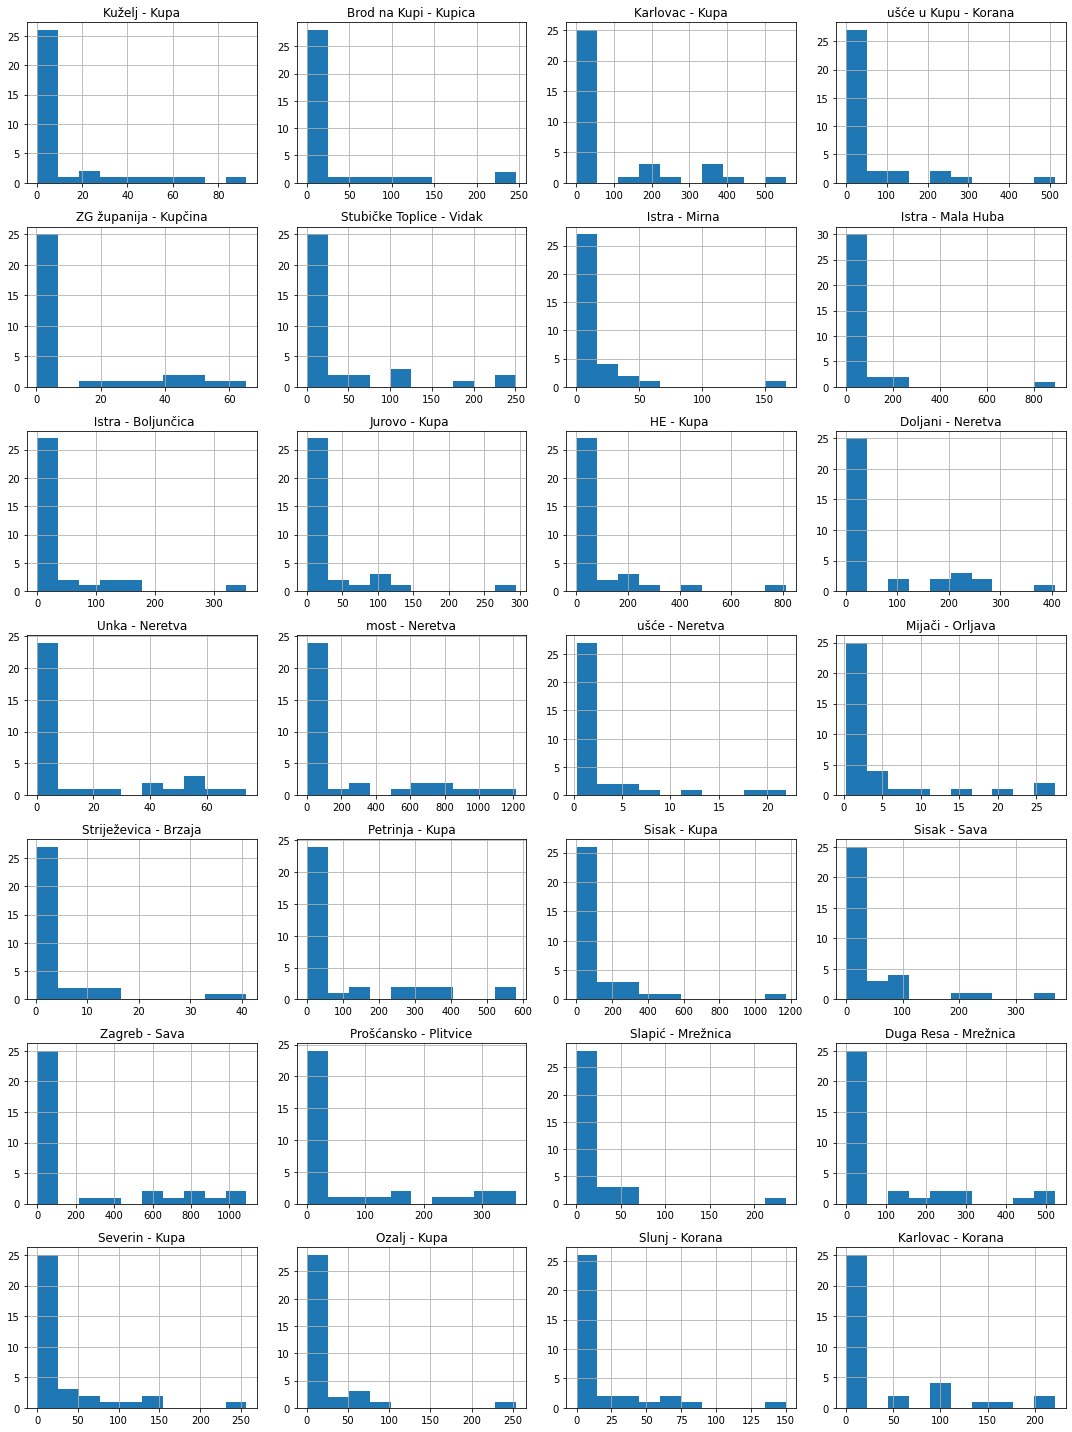

In [38]:
# Kreiranje matrice podgrafikona
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(15, 20))

# Iscrtavanje histograma za svaku kolonu
for i, column in enumerate(PBT_rel.columns):
    ax = axes[i // 4, i % 4]  # Određuje poziciju podgrafikona
    PBT_rel[column].hist(ax=ax)
    ax.set_title(column)

# Sakrijte sve prazne podgrafikone
for i in range(len(PBT_rel.columns), 28):
    axes[i // 4, i % 4].axis('off')

plt.tight_layout()

# Spremanje grafikona
plt.savefig('../../data/VEGA_QSAR_modeli/histogram.jpg', format='jpg', dpi=1000)


In [39]:
log_relpbt=np.log10(PBT_rel)

/home/ivana/repozitorij/diplomski/ivana_dip/dipenv/lib/python3.10/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


ValueError: supplied range of [-inf, 2.5683838994963146] is not finite

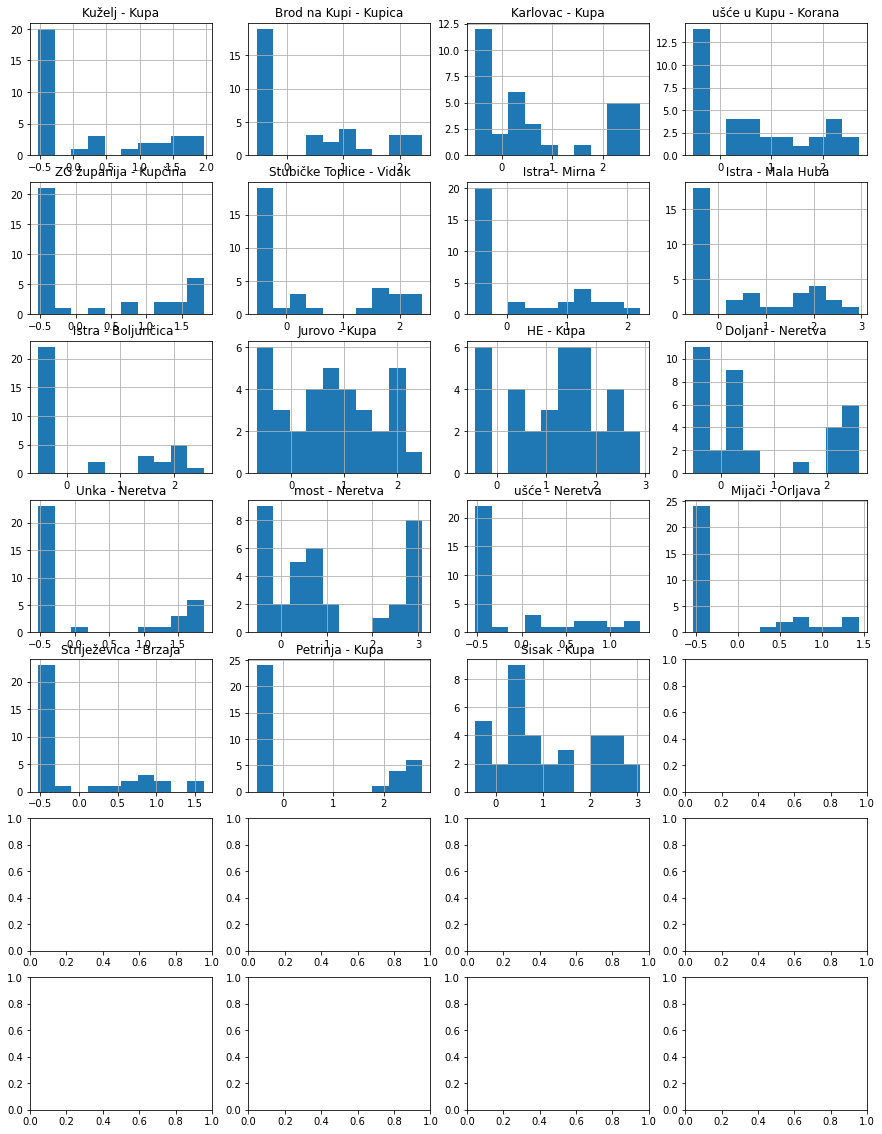

In [40]:
# Kreiranje matrice podgrafikona
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(15, 20))

# Iscrtavanje histograma za svaku kolonu
for i, column in enumerate(log_relpbt.columns):
    ax = axes[i // 4, i % 4]  # Određuje poziciju podgrafikona
    log_relpbt[column].hist(ax=ax)
    ax.set_title(column)

# Sakrijte sve prazne podgrafikone
for i in range(len(log_relpbt.columns), 28):
    axes[i // 4, i % 4].axis('off')

plt.tight_layout()

# Spremanje grafikona
#plt.savefig('../../data/VEGA_QSAR_modeli/histogram.jpg', format='jpg', dpi=1000)

# TO_EXCEL

In [41]:
with pd.ExcelWriter("../../data/VEGA_QSAR_modeli/PBT_results.xlsx") as writer:
    PERZ_modified.to_excel(writer, sheet_name="Persistence (P)")
    BCF_modified.to_excel(writer, sheet_name="Bioaccumulation (B)")
    toks_rank.to_excel(writer, sheet_name="Toxicity (T)")
    PBT_score.to_excel(writer, sheet_name="PBT_score")
    PBT_rel.to_excel(writer, sheet_name="PBT_rel")

In [42]:
with pd.ExcelWriter("../../data/VEGA_QSAR_modeli/concentration_results.xlsx") as writer:
    konc.to_excel(writer, sheet_name="Concentration")

# SPEARMAN CORRRELATION

In [43]:
from scipy.stats import spearmanr

# Izračun Spearmanove korelacije
corr_PB, p_value_PB = spearmanr(P, B)
corr_PT, p_value_PT = spearmanr(P, T)
corr_BT, p_value_BT = spearmanr(B, T)
corr_PBT_P, p_value_PBT_P = spearmanr(score_PBT, P)
corr_PBT_B, p_value_PBT_B = spearmanr(score_PBT, B)
corr_PBT_T, p_value_PBT_T = spearmanr(score_PBT, T)

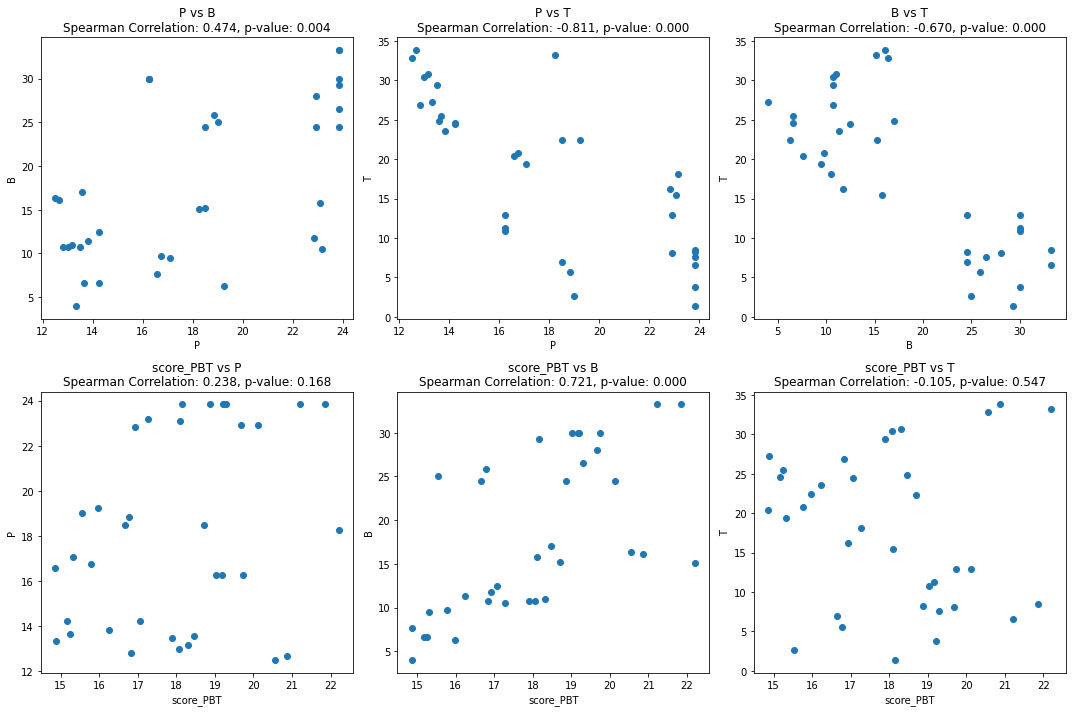

In [44]:
# Parovi za korelaciju
pairs = [('P', 'B', P, B), ('P', 'T', P, T), ('B', 'T', B, T), ('score_PBT', 'P', score_PBT, P), ('score_PBT', 'B', score_PBT, B), ('score_PBT', 'T', score_PBT, T)]

# Postavljanje figure za plotove
plt.figure(figsize=(15, 10))

for i, (var1, var2, data1, data2) in enumerate(pairs, 1):
    plt.subplot(2, 3, i)
    plt.scatter(data1, data2)
    corr, p_value = spearmanr(data1, data2)
    plt.title(f'{var1} vs {var2}\nSpearman Correlation: {corr:.3f}, p-value: {p_value:.3f}')
    plt.xlabel(var1)
    plt.ylabel(var2)

plt.tight_layout()
plt.show()


<Axes: xlabel='B', ylabel='T'>

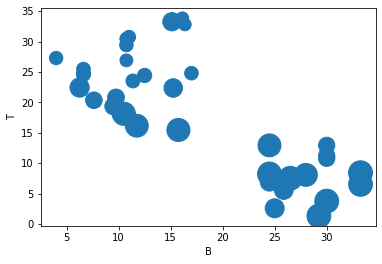

In [45]:
PBT_score.plot.scatter(x='B', y='T', s=np.square(P))

<Axes: xlabel='P', ylabel='T'>

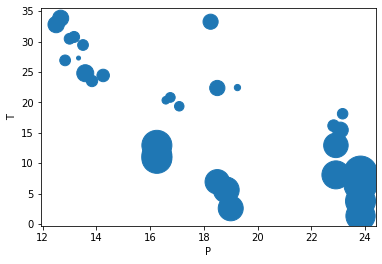

In [46]:
PBT_score.plot.scatter(x='P', y='T', s=np.square(B))

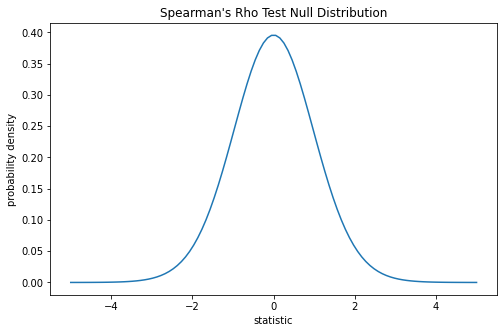

In [47]:
from scipy import stats
x=P
y=B
dof = len(x)-2  # len(x) == len(y)
dist = stats.t(df=dof)
t_vals = np.linspace(-5, 5, 100)
pdf = dist.pdf(t_vals)
fig, ax = plt.subplots(figsize=(8, 5))
def plot(ax):  # we'll re-use this
    ax.plot(t_vals, pdf)
    ax.set_title("Spearman's Rho Test Null Distribution")
    ax.set_xlabel("statistic")
    ax.set_ylabel("probability density")
plot(ax)
plt.show()

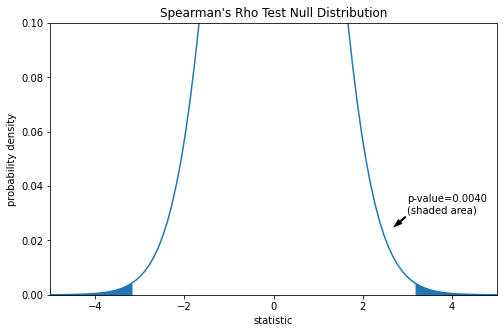

In [48]:
fig, ax = plt.subplots(figsize=(8, 5))
plot(ax)
res=spearmanr(B, P)
rs = res.statistic  # original statistic
transformed = rs * np.sqrt(dof / ((rs+1.0)*(1.0-rs)))
pvalue = dist.cdf(-transformed) + dist.sf(transformed)
annotation = (f'p-value={pvalue:.4f}\n(shaded area)')
props = dict(facecolor='black', width=1, headwidth=5, headlength=8)
_ = ax.annotate(annotation, (2.7, 0.025), (3, 0.03), arrowprops=props)
i = t_vals >= transformed
ax.fill_between(t_vals[i], y1=0, y2=pdf[i], color='C0')
i = t_vals <= -transformed
ax.fill_between(t_vals[i], y1=0, y2=pdf[i], color='C0')
ax.set_xlim(-5, 5)
ax.set_ylim(0, 0.1)
plt.show()

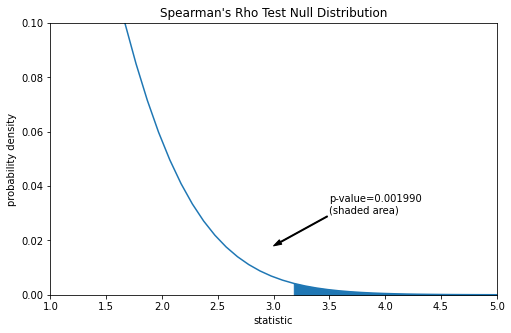

In [49]:
res = stats.spearmanr(x, y, alternative='greater')
res.statistic
0.7000000000000001  # same statistic
fig, ax = plt.subplots(figsize=(8, 5))
plot(ax)
pvalue = dist.sf(transformed)
annotation = (f'p-value={pvalue:.6f}\n(shaded area)')
props = dict(facecolor='black', width=1, headwidth=5, headlength=8)
_ = ax.annotate(annotation, (3, 0.018), (3.5, 0.03), arrowprops=props)
i = t_vals >= transformed
ax.fill_between(t_vals[i], y1=0, y2=pdf[i], color='C0')
ax.set_xlim(1, 5)
ax.set_ylim(0, 0.1)
plt.show()

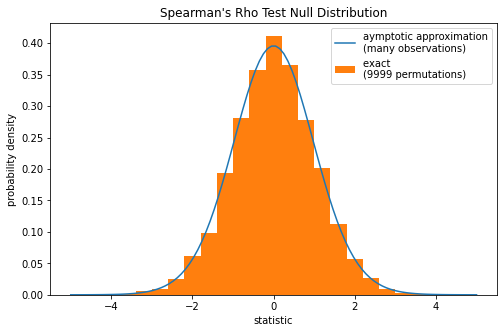

In [50]:
def statistic(x):  # explore all possible pairings by permuting `x`
    rs = stats.spearmanr(x, y).statistic  # ignore pvalue
    transformed = rs * np.sqrt(dof / ((rs+1.0)*(1.0-rs)))
    return transformed
ref = stats.permutation_test((x,), statistic, alternative='greater',
                             permutation_type='pairings')
fig, ax = plt.subplots(figsize=(8, 5))
plot(ax)
ax.hist(ref.null_distribution, np.linspace(-5, 5, 26),
        density=True)
ax.legend(['aymptotic approximation\n(many observations)',
           f'exact \n({len(ref.null_distribution)} permutations)'])
plt.show()